In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\investments_VC.csv", encoding = 'iso-8859-2')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(54294, 39)

In [4]:
data_cleaned = df.drop_duplicates()

In [5]:
data_cleaned.to_csv('cleaned_investments_VC.csv', index=False)

In [6]:
print("Original number of rows:", df.shape[0])
print("Number of rows after removing duplicates:", data_cleaned.shape[0])

Original number of rows: 54294
Number of rows after removing duplicates: 49439


In [7]:
data_cleaned.shape

(49439, 39)

In [8]:
data = data_cleaned
data.shape

(49439, 39)

In [73]:
data.head(5)

,name,category_list,market,funding_total_usd,country_code,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,...,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,status_acquired,status_closed,status_operating
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,USA,1.0,2012-06-01,2012-06,2012-Q2,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,True,False,False
1,&TV Communications,|Games|,Games,4000000.0,USA,2.0,NaT,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,False,False,True
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,EST,1.0,2012-10-26,2012-10,2012-Q4,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,False,False,True
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,GBR,1.0,2011-04-01,2011-04,2011-Q2,2011.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,False,False,True
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,USA,2.0,2014-01-01,2014-01,2014-Q1,2014.0,...,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,False,False,True


In [10]:
data[' funding_total_usd '] = data[' funding_total_usd '].replace('[\$,]', '', regex=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23544\3776153038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' funding_total_usd '] = data[' funding_total_usd '].replace('[\$,]', '', regex=True)


In [11]:
data[' funding_total_usd '] = pd.to_numeric(data[' funding_total_usd '], errors='coerce')

C:\Users\Dell\AppData\Local\Temp\ipykernel_23544\3158862307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' funding_total_usd '] = pd.to_numeric(data[' funding_total_usd '], errors='coerce')


In [12]:
print(data[' funding_total_usd '].dtype)
print(data[' funding_total_usd '].head())

float64
0    1750000.0
1    4000000.0
2      40000.0
3    1500000.0
4      60000.0
Name:  funding_total_usd , dtype: float64


In [13]:
# List of columns to drop (e.g., URLs, incomplete columns)
columns_to_drop = ['homepage_url', 'permalink', 'region', 'state_code', 'city']

# Drop the columns from the dataset
data_clean = data.drop(columns=columns_to_drop, axis=1)

# Save the cleaned dataset (optional)
data_clean.to_csv('clean_dataset.csv', index=False)

# Show the remaining columns after dropping
print("Remaining columns:", data_clean.columns)

Remaining columns: Index(['name', 'category_list', ' market ', ' funding_total_usd ', 'status',
       'country_code', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')


In [14]:
data1 = data_clean
data1.shape

(49439, 34)

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49439 entries, 0 to 49438
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   category_list         45477 non-null  object 
 2    market               45470 non-null  object 
 3    funding_total_usd    40907 non-null  float64
 4   status                48124 non-null  object 
 5   country_code          44165 non-null  object 
 6   funding_rounds        49438 non-null  float64
 7   founded_at            38554 non-null  object 
 8   founded_month         38482 non-null  object 
 9   founded_quarter       38482 non-null  object 
 10  founded_year          38482 non-null  float64
 11  first_funding_at      49438 non-null  object 
 12  last_funding_at       49438 non-null  object 
 13  seed                  49438 non-null  float64
 14  venture               49438 non-null  float64
 15  equity_crowdfunding   49

In [16]:
# Drop rows with any missing values
data_cleaned_rows = data1.dropna()

# Drop columns with missing values
data_cleaned_cols = data1.dropna(axis=1)

# Show the number of rows/columns after dropping
print("Data shape after dropping rows with missing values:", data_cleaned_rows.shape)
print("Data shape after dropping columns with missing values:", data_cleaned_cols.shape)

Data shape after dropping rows with missing values: (28292, 34)
Data shape after dropping columns with missing values: (49439, 0)


In [17]:
# Fill missing values with a specific value, such as 0
data_filled = data1.fillna(0, inplace = True)

# Fill missing numerical columns with the mean value
data1['funding_total_usd'] = data1[' funding_total_usd '].fillna(data1[' funding_total_usd '].mean())

# Fill missing categorical columns with the most frequent value (mode)
data1['status'] = data1['status'].fillna(data1['status'].mode()[0])

# Check the updated dataset
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49439 entries, 0 to 49438
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49439 non-null  object 
 1   category_list         49439 non-null  object 
 2    market               49439 non-null  object 
 3    funding_total_usd    49439 non-null  float64
 4   status                49439 non-null  object 
 5   country_code          49439 non-null  object 
 6   funding_rounds        49439 non-null  float64
 7   founded_at            49439 non-null  object 
 8   founded_month         49439 non-null  object 
 9   founded_quarter       49439 non-null  object 
 10  founded_year          49439 non-null  float64
 11  first_funding_at      49439 non-null  object 
 12  last_funding_at       49439 non-null  object 
 13  seed                  49439 non-null  float64
 14  venture               49439 non-null  float64
 15  equity_crowdfunding   49

In [18]:
data1.shape

(49439, 35)

In [19]:
# 1. Convert date columns (founded_at, first_funding_at) to datetime
data1['founded_at'] = pd.to_datetime(data1['founded_at'], errors='coerce')
data1['first_funding_at'] = pd.to_datetime(data1['first_funding_at'], errors='coerce')

# 2. Convert numeric columns (e.g., funding_total_usd) to numeric
data1[' funding_total_usd '] = pd.to_numeric(data1[' funding_total_usd '].replace('[\$,]', '', regex=True), errors='coerce')

# 3. Handle categorical columns (converting to category type or using one-hot encoding)
# Example: Converting 'status' column to categorical type
data1['status'] = data1['status'].astype('category')

# If needed, you can also apply one-hot encoding for categorical variables
# Example: One-hot encoding the 'status' column for analysis
data1 = pd.get_dummies(data1, columns=['status'], drop_first=True)

# Check the data after transformations
print(data1.info())
print(data1[['founded_at', 'first_funding_at', ' funding_total_usd ']].head())

<class 'pandas.core.frame.DataFrame'>
Index: 49439 entries, 0 to 49438
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  49439 non-null  object        
 1   category_list         49439 non-null  object        
 2    market               49439 non-null  object        
 3    funding_total_usd    49439 non-null  float64       
 4   country_code          49439 non-null  object        
 5   funding_rounds        49439 non-null  float64       
 6   founded_at            38553 non-null  datetime64[ns]
 7   founded_month         49439 non-null  object        
 8   founded_quarter       49439 non-null  object        
 9   founded_year          49439 non-null  float64       
 10  first_funding_at      49428 non-null  datetime64[ns]
 11  last_funding_at       49439 non-null  object        
 12  seed                  49439 non-null  float64       
 13  venture              

# Understanding Distribution:

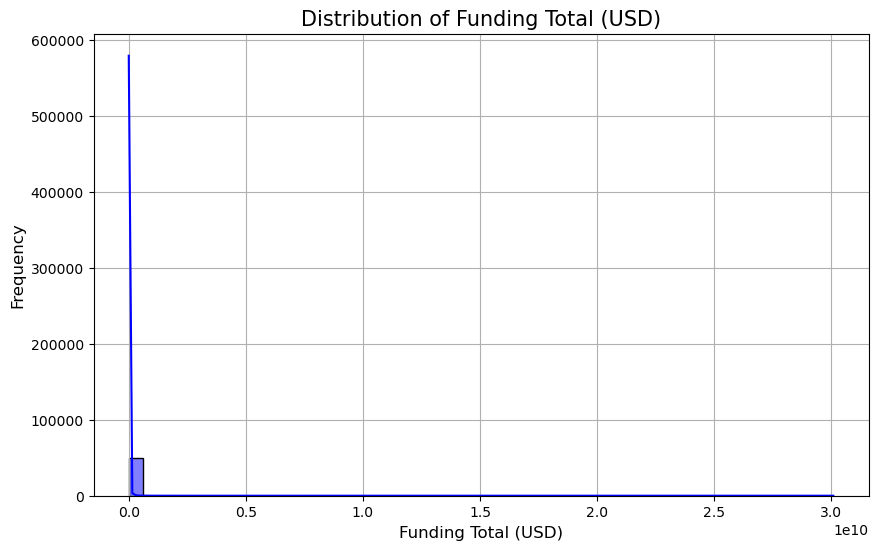

In [20]:
# 1. Plot distribution for 'funding_total_usd'
plt.figure(figsize=(10, 6))
sns.histplot(data1[' funding_total_usd '], bins=50, kde=True, color='blue')
plt.title('Distribution of Funding Total (USD)', fontsize=15)
plt.xlabel('Funding Total (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

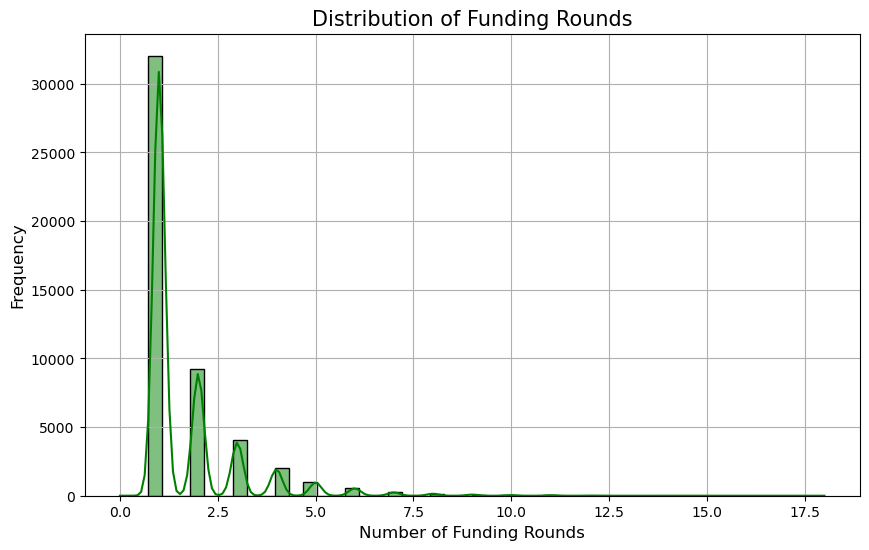

In [21]:
# 2. Plot distribution for 'funding_rounds'
plt.figure(figsize=(10, 6))
sns.histplot(data1['funding_rounds'], bins=50, kde=True, color='green')
plt.title('Distribution of Funding Rounds', fontsize=15)
plt.xlabel('Number of Funding Rounds', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

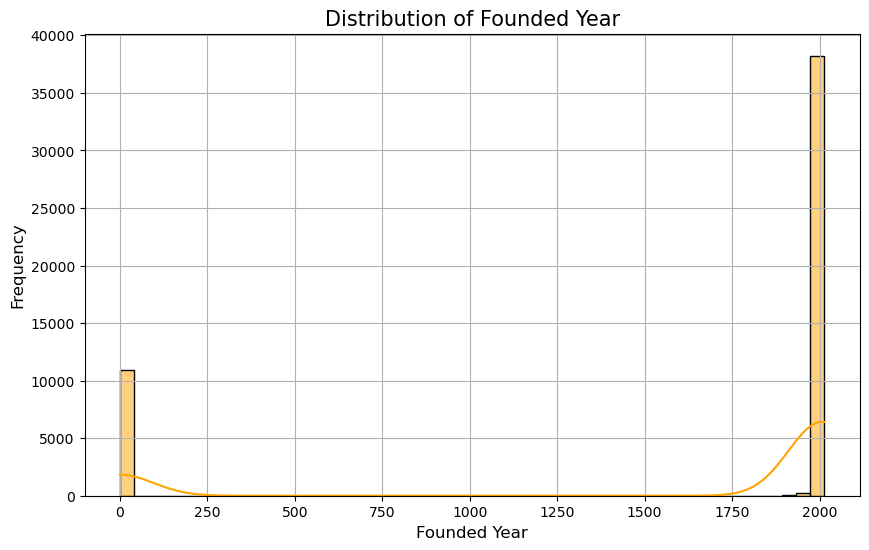

In [22]:
# 3. Plot distribution for 'founded_year'
plt.figure(figsize=(10, 6))
sns.histplot(data1['founded_year'], bins=50, kde=True, color='orange')
plt.title('Distribution of Founded Year', fontsize=15)
plt.xlabel('Founded Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [23]:
# Optionally, print summary statistics to identify outliers or anomalies
print("Summary statistics for Funding Total (USD):\n", data1[' funding_total_usd '].describe())
print("\nSummary statistics for Funding Rounds:\n", data1['funding_rounds'].describe())
print("\nSummary statistics for Founded Year:\n", data1['founded_year'].describe())

Summary statistics for Funding Total (USD):
 count    4.943900e+04
mean     1.316640e+07
std      1.535525e+08
min      0.000000e+00
25%      5.000000e+04
50%      1.000000e+06
75%      6.771937e+06
max      3.007950e+10
Name:  funding_total_usd , dtype: float64

Summary statistics for Funding Rounds:
 count    49439.000000
mean         1.696171
std          1.294222
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         18.000000
Name: funding_rounds, dtype: float64

Summary statistics for Founded Year:
 count    49439.000000
mean      1562.474848
std        833.774114
min          0.000000
25%       1993.000000
50%       2008.000000
75%       2011.000000
max       2014.000000
Name: founded_year, dtype: float64


# Catagory & Market Analysis:

In [24]:
# 1. Analyze the distribution of startups by 'category_list'
category_funding = data1.groupby('category_list')[' funding_total_usd '].sum().sort_values(ascending=False)
category_startups = data1['category_list'].value_counts()

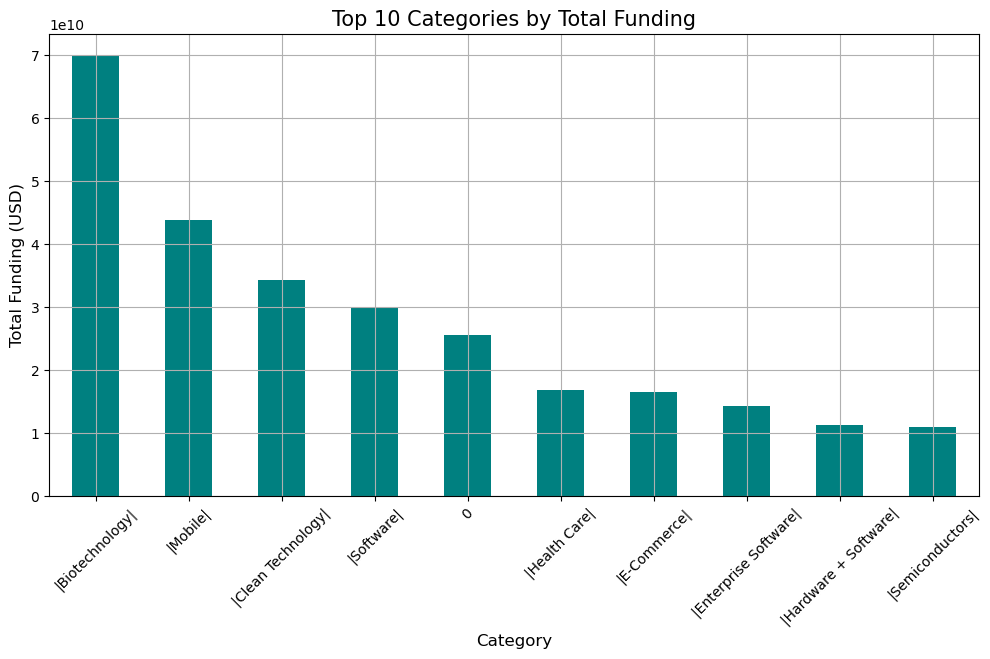

In [25]:
# 2. Visualize the top 10 categories by total funding
plt.figure(figsize=(12, 6))
category_funding.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Categories by Total Funding', fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Funding (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

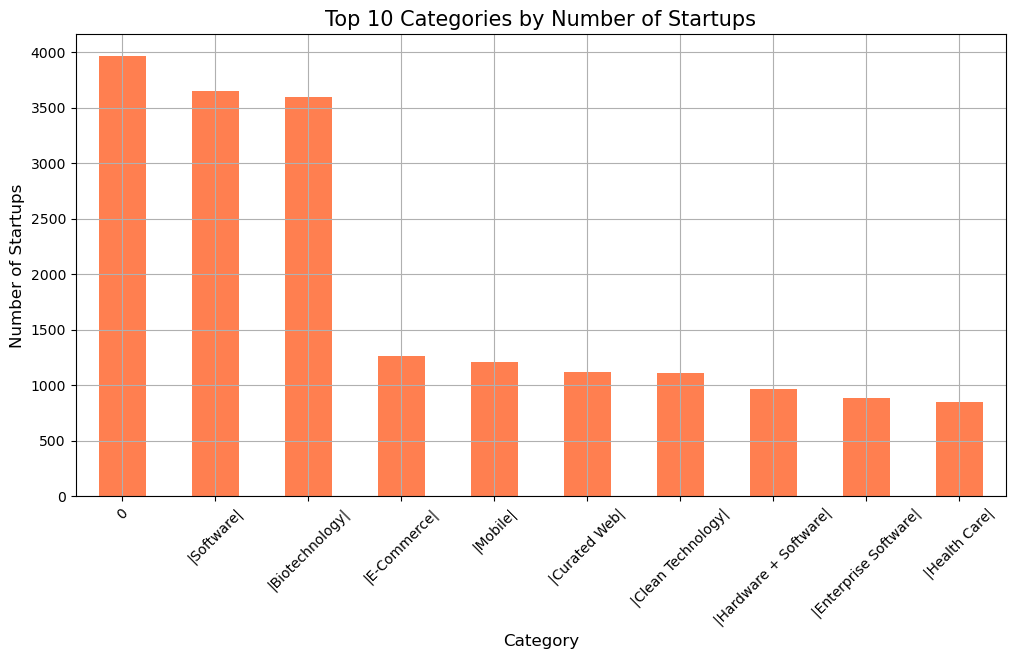

In [26]:
# 3. Visualize the top 10 categories by number of startups
plt.figure(figsize=(12, 6))
category_startups.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Categories by Number of Startups', fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [27]:
# 4. Analyze the distribution of startups by 'market'
market_funding = data1.groupby(' market ')[' funding_total_usd '].sum().sort_values(ascending=False)
market_startups = data1[' market '].value_counts()

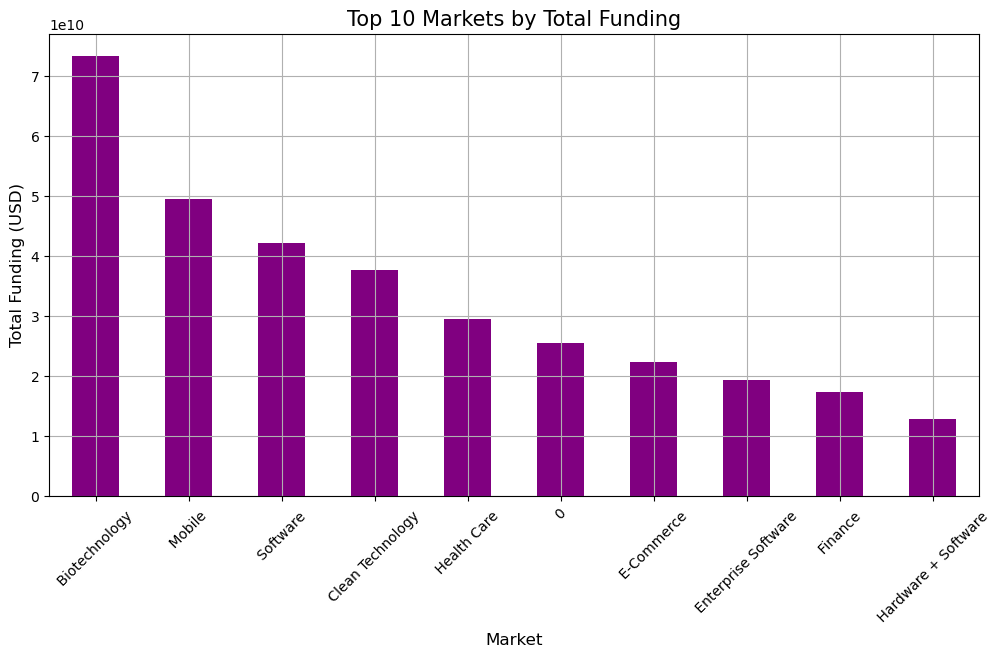

In [28]:
# 5. Visualize the top 10 markets by total funding
plt.figure(figsize=(12, 6))
market_funding.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Markets by Total Funding', fontsize=15)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Total Funding (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

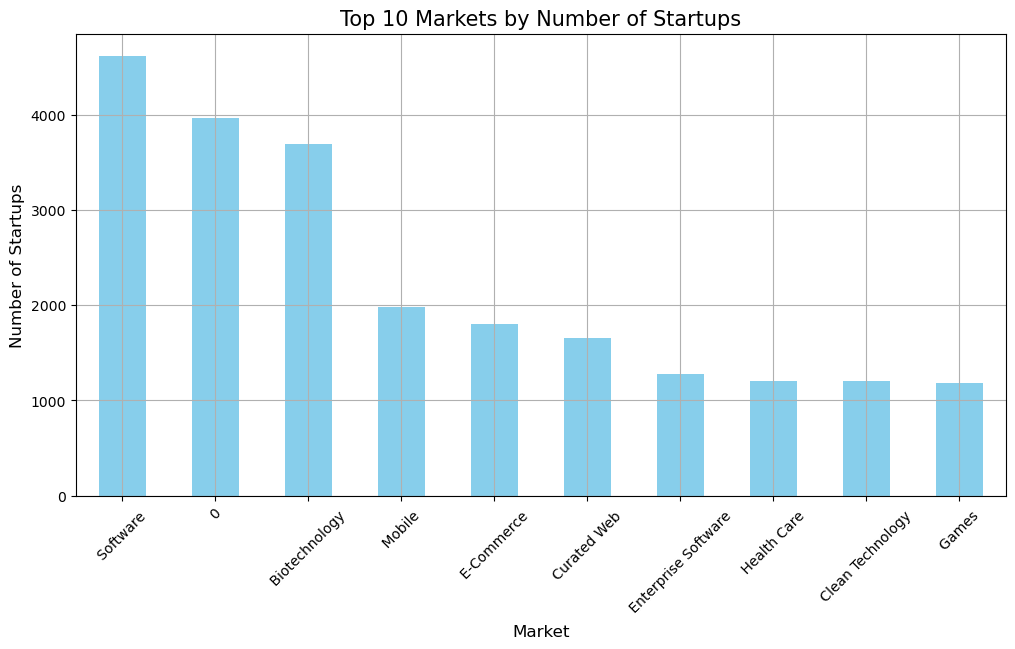

In [29]:
# 6. Visualize the top 10 markets by number of startups
plt.figure(figsize=(12, 6))
market_startups.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Markets by Number of Startups', fontsize=15)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Geographical Insights:

In [30]:
# 1. Analyze funding and number of startups by country
country_funding = data1.groupby('country_code')[' funding_total_usd '].sum().sort_values(ascending=False)
country_startups = data1['country_code'].value_counts()

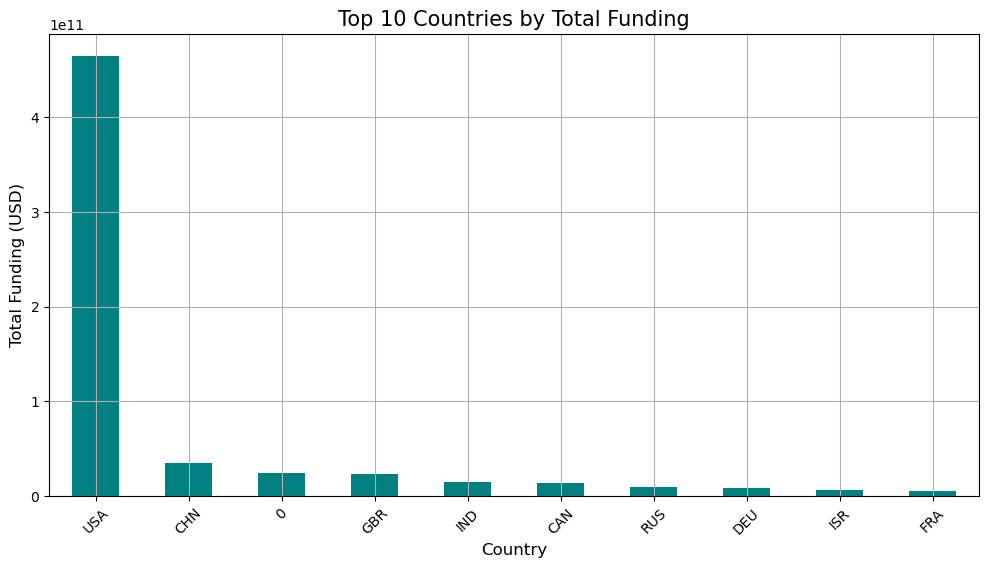

In [31]:
# 2. Visualize the top 10 countries by total funding
plt.figure(figsize=(12, 6))
country_funding.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Total Funding', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Funding (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

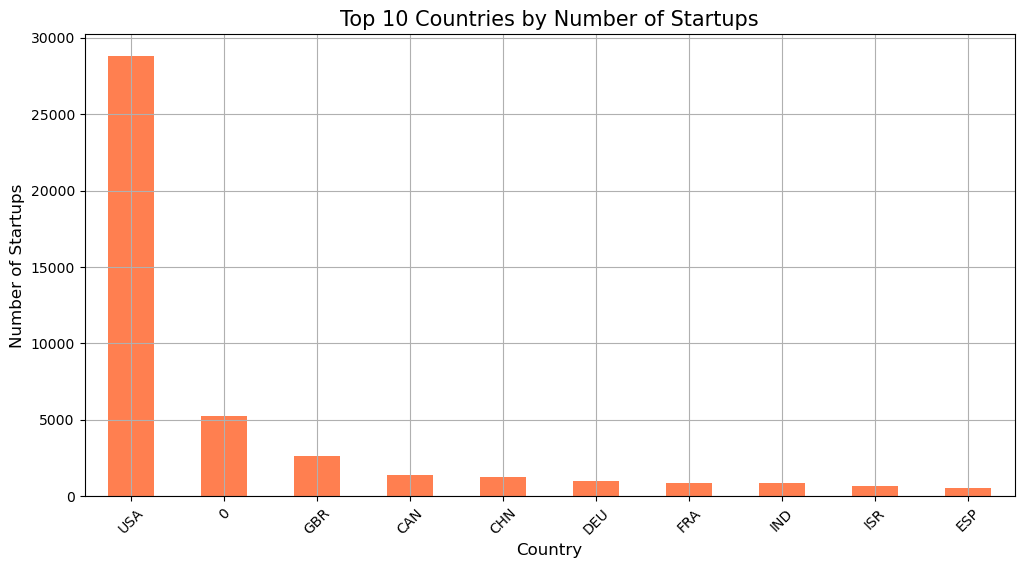

In [32]:
# 5. Visualize the top 10 countries by number of startups
plt.figure(figsize=(12, 6))
country_startups.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Number of Startups', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [33]:
# 1. Analyze the total funding by different funding rounds
funding_rounds_funding = data1.groupby('category_list')[' funding_total_usd '].sum().sort_values(ascending=False)
funding_rounds_count = data1['category_list'].value_counts()

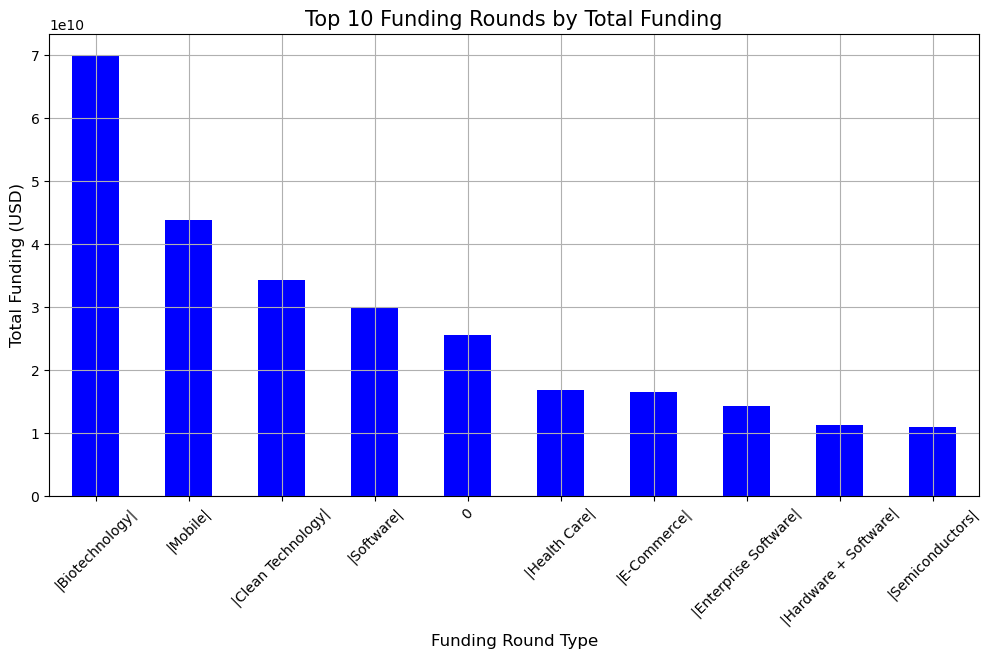

In [34]:
# 2. Visualize the top 10 funding rounds by total funding
plt.figure(figsize=(12, 6))
funding_rounds_funding.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Funding Rounds by Total Funding', fontsize=15)
plt.xlabel('Funding Round Type', fontsize=12)
plt.ylabel('Total Funding (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

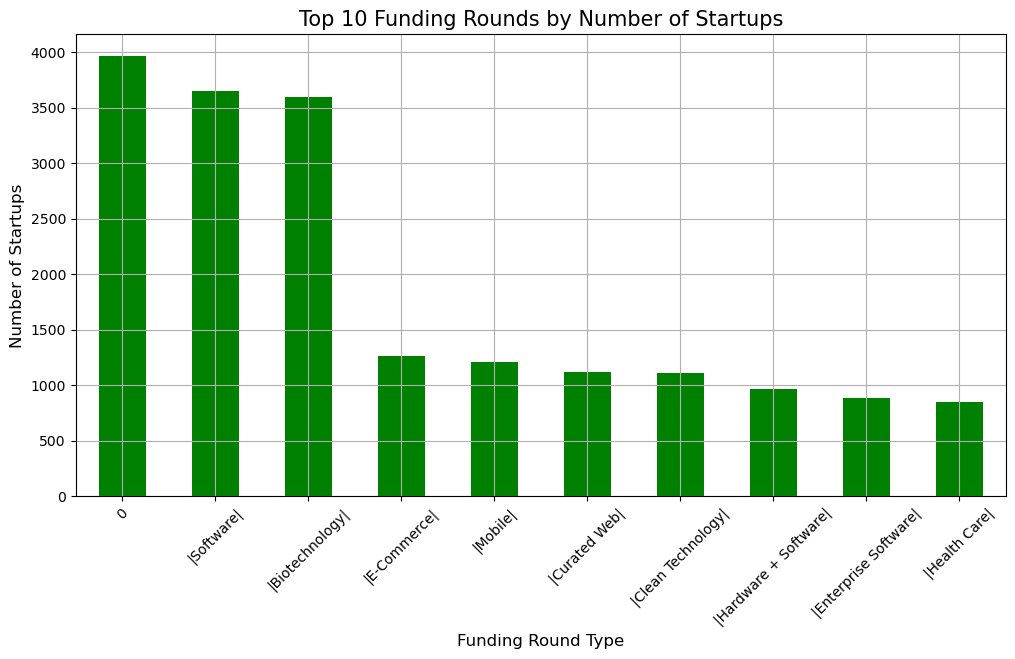

In [35]:
# 3. Visualize the top 10 funding rounds by frequency (number of startups)
plt.figure(figsize=(12, 6))
funding_rounds_count.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Funding Rounds by Number of Startups', fontsize=15)
plt.xlabel('Funding Round Type', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [36]:
from scipy.stats import pearsonr, spearmanr

In [38]:
## Convert 'funding_total_usd' to numeric
data1[' funding_total_usd '] = pd.to_numeric(data1[' funding_total_usd '].replace('[\$,]', '', regex=True), errors='coerce')

In [42]:
# Drop rows where conversion failed (NaN values)
data = data1.dropna(subset=['funding_total_usd'])

In [43]:
# Now 'funding_total_usd' is in numeric format
print(data1['funding_total_usd'].head())

0    1750000.0
1    4000000.0
2      40000.0
3    1500000.0
4      60000.0
Name: funding_total_usd, dtype: float64


In [44]:
# 1. Compute the correlation matrix
corr_matrix = data1.corr(method='pearson')

ValueError: could not convert string to float: '#waywire'

In [45]:
# 3. Analyze specific correlations
## Correlation between 'funding_total_usd' and 'funding_rounds'
funding_total = data1[' funding_total_usd ']
funding_rounds = data1['funding_rounds']
corr_coefficient, p_value = pearsonr(funding_total, funding_rounds)
print(f"Pearson Correlation between 'funding_total_usd' and 'funding_rounds': {corr_coefficient:.2f} (p-value: {p_value:.2e})")

Pearson Correlation between 'funding_total_usd' and 'funding_rounds': 0.11 (p-value: 5.33e-134)


C:\Users\Dell\Downloads\ANA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


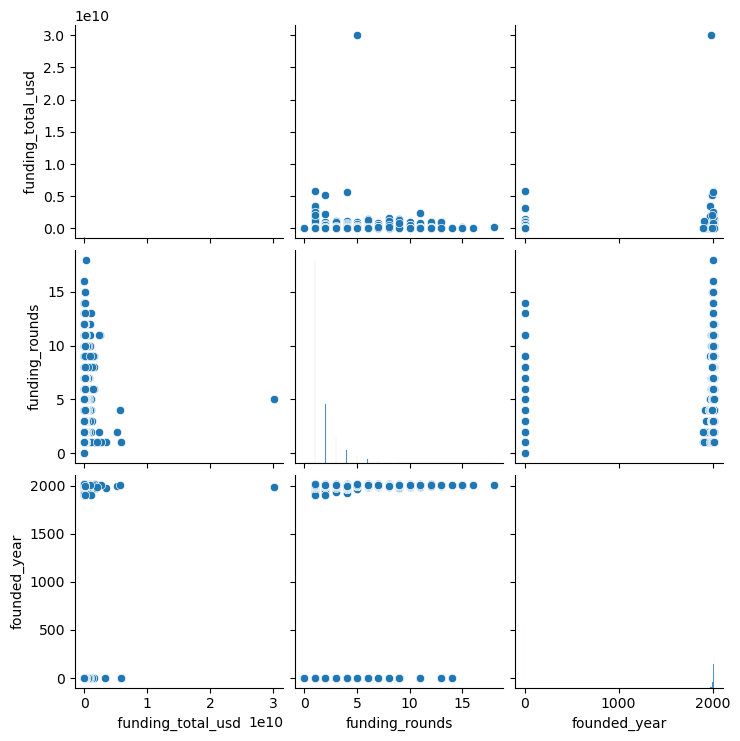

In [46]:
# 4. Visualize relationships with pair plots
sns.pairplot(data1[[' funding_total_usd ', 'funding_rounds', 'founded_year']])
plt.show()

In [47]:
# 5. Correlation between categorical and continuous variables
## Encode 'market' as a categorical variable
data1[' market '] = data1[' market '].astype('category').cat.codes

In [48]:
## Compute correlation
market_corr = data1[[' market ', ' funding_total_usd ']].corr(method='pearson')
print(f"Correlation between ' market ' and 'funding_total_usd':\n{market_corr}")

Correlation between ' market ' and 'funding_total_usd':
                      market    funding_total_usd 
 market              1.000000            -0.001054
 funding_total_usd  -0.001054             1.000000


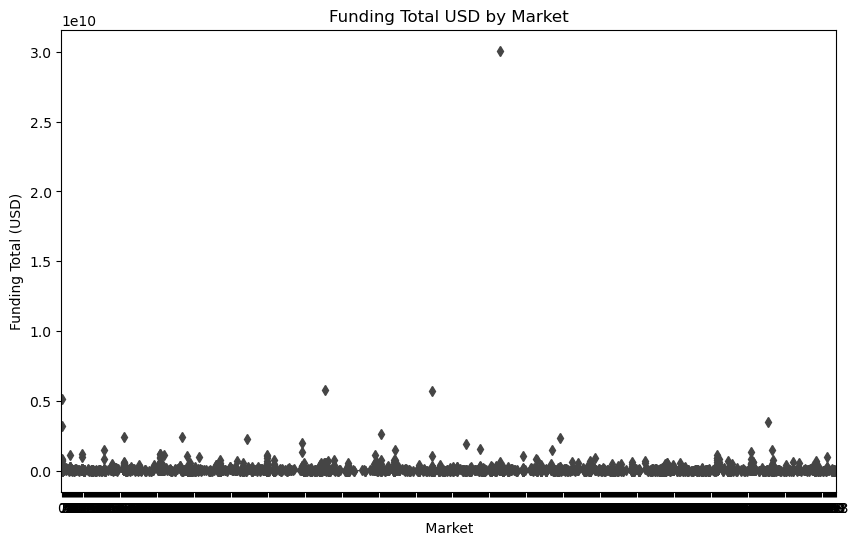

In [49]:
# 6. Visualize the relationship between 'market' and 'funding_total_usd'
plt.figure(figsize=(10, 6))
sns.boxplot(x=' market ', y=' funding_total_usd ', data=data1)
plt.title('Funding Total USD by Market')
plt.xlabel(' Market ')
plt.ylabel('Funding Total (USD)')
plt.show()

In [50]:
# Convert 'founded_at' and 'first_funding_at' to datetime
data1['founded_at'] = pd.to_datetime(data1['founded_at'], errors='coerce')
data1['first_funding_at'] = pd.to_datetime(data1['first_funding_at'], errors='coerce')

In [51]:
# Extract the founding year
data1['founded_year'] = data1['founded_at'].dt.year

In [52]:
# 1. Correlation between founding year and total funding
founding_vs_funding = data1[['founded_year', 'funding_total_usd']].dropna()

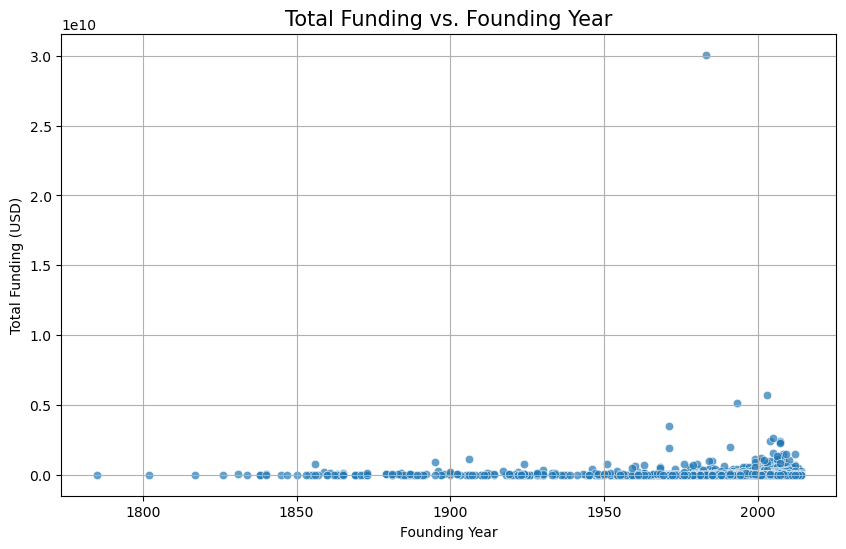

In [53]:
# Plotting the relationship between founding year and total funding
plt.figure(figsize=(10, 6))
sns.scatterplot(x='founded_year', y='funding_total_usd', data=founding_vs_funding, alpha=0.7)
plt.title('Total Funding vs. Founding Year', fontsize=15)
plt.xlabel('Founding Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.show()

In [54]:
# 2. Time to first funding round (years)
# Calculate the number of days between founding and first funding
data1['time_to_first_funding'] = (data1['first_funding_at'] - data1['founded_at']).dt.days / 365.25  # Convert to years

In [55]:
# 3. Correlation between time to first funding and total funding
timing_vs_funding = data1[['time_to_first_funding', 'funding_total_usd']].dropna()

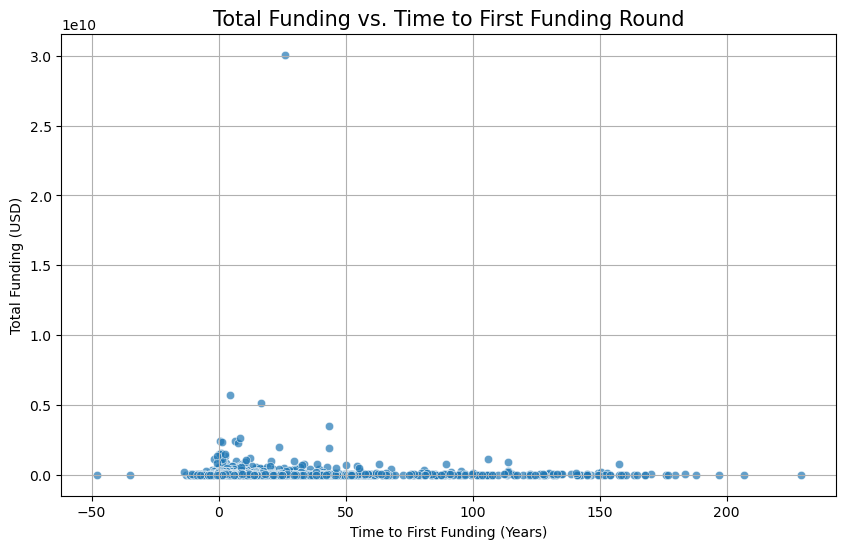

In [56]:
# Plotting the relationship between time to first funding and total funding
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time_to_first_funding', y='funding_total_usd', data=timing_vs_funding, alpha=0.7)
plt.title('Total Funding vs. Time to First Funding Round', fontsize=15)
plt.xlabel('Time to First Funding (Years)')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.show()

In [57]:
# 4. Analyze the correlation values
corr_founded_year_funding = founding_vs_funding['founded_year'].corr(founding_vs_funding['funding_total_usd'])
corr_time_to_funding_funding = timing_vs_funding['time_to_first_funding'].corr(timing_vs_funding['funding_total_usd'])

In [58]:
print(f"Correlation between Founding Year and Total Funding: {corr_founded_year_funding:.2f}")
print(f"Correlation between Time to First Funding and Total Funding: {corr_time_to_funding_funding:.2f}")

Correlation between Founding Year and Total Funding: -0.06
Correlation between Time to First Funding and Total Funding: 0.05


In [59]:
#Boxplot to show distribution of total funding by founding decade
data1['founded_decade'] = (data1['founded_year'] // 10) * 10

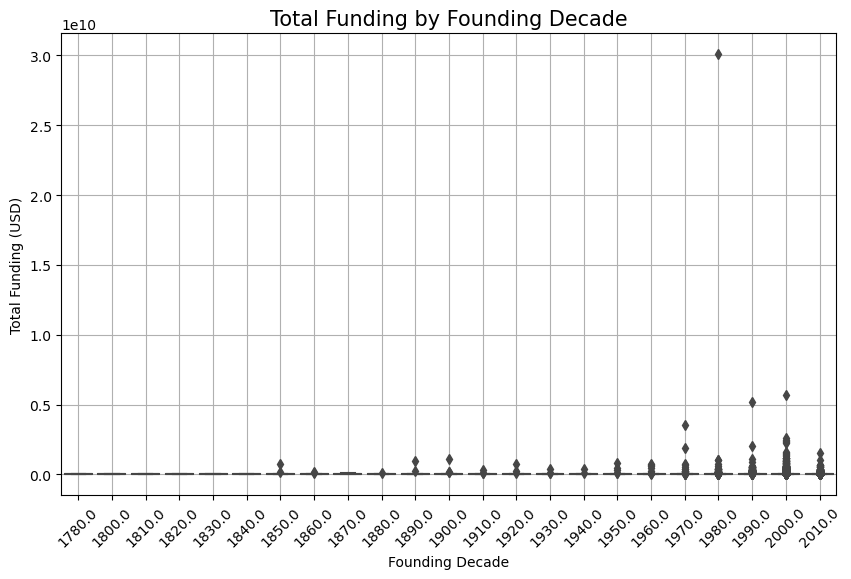

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='founded_decade', y='funding_total_usd', data=data1)
plt.title('Total Funding by Founding Decade', fontsize=15)
plt.xlabel('Founding Decade')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [61]:
import scipy.stats as stats

In [63]:
# 1. Hypothesis 1: Do startups in certain categories receive significantly more funding than others?
# ---------------------------------------------------------------------------
## ANOVA test: Funding by Category
# Group funding by category
categories = data1['category_list'].unique()
funding_by_category = [data1[data1['category_list'] == cat]['funding_total_usd'] for cat in categories]

In [64]:
# Perform one-way ANOVA
anova_result = stats.f_oneway(*funding_by_category)

In [65]:
# Check p-value
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There's a significant difference in funding across categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in funding across categories.")

Fail to reject the null hypothesis: No significant difference in funding across categories.


In [67]:
# 2. Hypothesis 2: Does location (e.g., country) significantly impact total funding received?
# ---------------------------------------------------------------------------
## T-test: Funding by Location (for two countries, say 'USA' vs. 'Canada')

In [69]:
# Drop rows with missing country information
data1.dropna(subset=['country_code'], inplace=True)

In [74]:
# Filter for two specific countries (e.g., USA and Canada)
usa_funding = data1[data1['country_code'] == 'USA']['funding_total_usd']
canada_funding = data1[data1['country_code'] == 'CAN']['funding_total_usd']

In [75]:
# Perform independent t-test
t_stat, p_val = stats.ttest_ind(usa_funding, canada_funding, nan_policy='omit')

In [76]:
# Check p-value
if p_val < 0.05:
    print("Reject the null hypothesis: There's a significant difference in funding between USA and Canada.")
else:
    print("Fail to reject the null hypothesis: No significant difference in funding between USA and Canada.")

Fail to reject the null hypothesis: No significant difference in funding between USA and Canada.


In [77]:
## T-test: Funding by Location (for two countries, say 'USA' vs. 'China')

In [78]:
# Filter for two specific countries (e.g., USA and China)
usa_funding = data1[data1['country_code'] == 'USA']['funding_total_usd']
china_funding = data1[data1['country_code'] == 'CHN']['funding_total_usd']

In [79]:
# Perform independent t-test
t_stat, p_val = stats.ttest_ind(usa_funding, china_funding, nan_policy='omit')

In [80]:
# Check p-value
if p_val < 0.05:
    print("Reject the null hypothesis: There's a significant difference in funding between USA and China.")
else:
    print("Fail to reject the null hypothesis: No significant difference in funding between USA and China.")

Reject the null hypothesis: There's a significant difference in funding between USA and China.


In [97]:
## T-test: Funding by Location (for two countries, say 'India' vs. 'China')

In [98]:
# Filter for two specific countries (e.g., India and China)
india_funding = data1[data1['country_code'] == 'IND']['funding_total_usd']
china_funding = data1[data1['country_code'] == 'CHN']['funding_total_usd']

In [99]:
# Perform independent t-test
t_stat, p_val = stats.ttest_ind(india_funding, china_funding, nan_policy='omit')

In [100]:
# Check p-value
if p_val < 0.05:
    print("Reject the null hypothesis: There's a significant difference in funding between India and China.")
else:
    print("Fail to reject the null hypothesis: No significant difference in funding between India and China.")

Reject the null hypothesis: There's a significant difference in funding between India and China.


In [81]:
# Testing Hypothesis

In [82]:
# Drop rows with missing funding_total_usd or category
data1.dropna(subset=['funding_total_usd', 'category_list', 'country_code'], inplace=True)

In [83]:
### 1. Hypothesis Test 1: Mean Funding Across Market Categories (ANOVA)
# -----------------------------------------------------------------------
# Group funding by market category
categories = data1['category_list'].unique()
funding_by_category = [data1[data1['category_list'] == cat]['funding_total_usd'] for cat in categories]

In [84]:
# Perform one-way ANOVA test
anova_result = stats.f_oneway(*funding_by_category)

In [85]:
# Check p-value
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There's a significant difference in mean funding across market categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean funding across market categories.")

Fail to reject the null hypothesis: No significant difference in mean funding across market categories.


In [87]:
### 2. Hypothesis Test 2: Mean Funding Across Geographical Regions (t-Test)
# -----------------------------------------------------------------------
# Compare mean funding between two countries, e.g., USA vs. China

In [88]:
# Filter for USA and China
usa_funding = data1[data1['country_code'] == 'USA']['funding_total_usd']
china_funding = data1[data1['country_code'] == 'CHN']['funding_total_usd']

In [89]:
# Perform independent t-test
t_stat, p_val = stats.ttest_ind(usa_funding, china_funding, nan_policy='omit')

In [92]:
# Check p-value
if p_val < 0.05:
    print("Reject the null hypothesis: There's a significant difference in mean funding between USA and China.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean funding between USA and China.")

Reject the null hypothesis: There's a significant difference in mean funding between USA and China.


In [93]:
### 3. Hypothesis Test 2: Mean Funding Across Geographical Regions (t-Test)
# -----------------------------------------------------------------------
# Compare mean funding between two countries, e.g., India vs. China

In [94]:
# Filter for USA and China
india_funding = data1[data1['country_code'] == 'IND']['funding_total_usd']
china_funding = data1[data1['country_code'] == 'CHN']['funding_total_usd']

In [95]:
# Perform independent t-test
t_stat, p_val = stats.ttest_ind(india_funding, china_funding, nan_policy='omit')

In [96]:
# Check p-value
if p_val < 0.05:
    print("Reject the null hypothesis: There's a significant difference in mean funding between India and China.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean funding between India and China.")

Reject the null hypothesis: There's a significant difference in mean funding between India and China.


In [101]:
### Multiple Countries (ANOVA for More than Two Countries)
# -----------------------------------------------------------------------
# Compare mean funding across multiple countries using ANOVA
countries = ['USA', 'Canada', 'UK']  # Add more countries as needed
funding_by_country = [data1[data1['country_code'] == country_code]['funding_total_usd'] for country_code in countries]

In [102]:
# Perform ANOVA
anova_country_result = stats.f_oneway(*funding_by_country)

C:\Users\Dell\Downloads\ANA\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [103]:
# Check p-value for country comparison
if anova_country_result.pvalue < 0.05:
    print("Reject the null hypothesis: There's a significant difference in mean funding across countries.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean funding across countries.")

Fail to reject the null hypothesis: No significant difference in mean funding across countries.
